# Tipos de gráficos estadísticos
## Diferentes tipos de datos estadísticos y su funcionalidad

Para entender mejor el uso y funcionamiento de las gráficas se utilizará la librería bokek, esta librería es gratuita de fácil uso y es una alternativa a matplorlib. Antes de realizar las gráficas es necesario importar las librerías para graficar

## Gráfico de barras

In [1]:
from bokeh.io import show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

Se debe indicar a la librería que los gráficos se mostraran en este notebook

In [2]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

El gráfico de barras se utiliza para presentar la relación entre dos variables, una de ellas va en el eje de las x, la otra en el eje de las y, así podemos saber la totalidad de cada una dependiendo del tamaño de las barras.

Para este ejemplo hay un cantidad de frutas que queremos visualizar por tipo

In [3]:
from pandas import DataFrame
fruits = ['Manzana', 'Pera', 'Banano', 'Mandarina', 'Uva', 'Fresa']
counts = [5, 3, 4, 2, 4, 6]
dt = DataFrame(data={'fruta':fruits,'cantidad':counts})

In [4]:
dt

,fruta,cantidad
0,Manzana,5
1,Pera,3
2,Banano,4
3,Mandarina,2
4,Uva,4
5,Fresa,6


In [5]:
# fuente de datos
source = ColumnDataSource(data=dt)

# se crea el espacio de la figura
p = figure(x_range=fruits, height=350, toolbar_location=None, title="Cantida de frutas")

# se genera la gráfica
p.vbar(x='fruta', top='cantidad', width=0.9, source=source, legend_field="fruta",
        line_color='white', fill_color=factor_cmap('fruta', palette=Spectral6, factors=fruits))

# características de la gráfica, leyenda, orientación de la leyenda
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 9
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

Existen variaciones de este tipo de gráfica a saber gráficos de barras horizontales, y apiladas, por ejemplo para mostrar producción por año, así poder visualizar tres variables

In [6]:
from bokeh.plotting import figure, show

fruits = ['Manzana', 'Pera', 'Banano', 'Mandarina', 'Uva', 'Fresa']
years = ["2015", "2016", "2017"]
colors = ["#c9d9d3", "#718dbf", "#e84d60"]

data = {'frutas' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 4, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

p = figure(x_range=fruits, height=250, title="Cantidad de frutas por año",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(years, x='frutas', width=0.9, color=colors, source=data,
             legend_label=years)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

También se pueden realizar gráficos de barras agrupadas por categoría para comparar por año, esta es otra forma de poder representar el gráfico de barras
apiladas, con la diferencia de agrupar los datos por diferentes tipos de fruta para un mismo año

In [7]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.transform import dodge

fruits = ['Manzana', 'Pera', 'Banano', 'Mandarina', 'Uva', 'Fresa']
years = ["2015", "2016", "2017"]
colors = ["#c9d9d3", "#718dbf", "#e84d60"]

data = {'frutas' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 4, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

source = ColumnDataSource(data=data)

p = figure(x_range=fruits, y_range=(0, 10), title="Total de frutas por año",
           height=350, toolbar_location=None, tools="")

p.vbar(x=dodge('frutas', -0.25, range=p.x_range), top='2015', source=source,
       width=0.2, color="#c9d9d3", legend_label="2015")

p.vbar(x=dodge('frutas',  0.0,  range=p.x_range), top='2016', source=source,
       width=0.2, color="#718dbf", legend_label="2016")

p.vbar(x=dodge('frutas',  0.25, range=p.x_range), top='2017', source=source,
       width=0.2, color="#e84d60", legend_label="2017")

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"


show(p)

## Histograma

Es una serie de muchas barras una al lado del otro que sirve para mostrar distribuciones [ref1](https://docs.bokeh.org/en/latest/docs/gallery/latex_normal_distribution.html#latex-normal-distribution-py)

In [8]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import Div, TeX
from bokeh.plotting import figure, show

p = figure(width=670, height=400, toolbar_location=None,
           title="Distribución normal Gaussiana")

n = 1000
rng = np.random.default_rng(825914)
x = rng.normal(loc=4.7, scale=12.3, size=n)

# Scale random data so that it has mean of 0 and standard deviation of 1
xbar = x.mean()
sigma = x.std()
scaled = (x - xbar) / sigma

# Histogram
bins = np.linspace(-3, 3, 40)
hist, edges = np.histogram(scaled, density=True, bins=bins)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
         fill_color="skyblue", line_color="white",
         legend_label=f"{n} Muestras normales")

# Probability density function
x = np.linspace(-3.0, 3.0, 100)
pdf = np.exp(-0.5*x**2) / np.sqrt(2.0*np.pi)
p.line(x, pdf, line_width=2, line_color="navy",
       legend_label="Function de densidad de probabilidad")

p.y_range.start = 0
p.xaxis.axis_label = "x"
p.yaxis.axis_label = "PDF(x)"

p.xaxis.ticker = [-3, -2, -1, 0, 1, 2, 3]
p.xaxis.major_label_overrides = {
    -3: TeX(r"\overline{x} - 3\sigma"),
    -2: TeX(r"\overline{x} - 2\sigma"),
    -1: TeX(r"\overline{x} - \sigma"),
     0: TeX(r"\overline{x}"),
     1: TeX(r"\overline{x} + \sigma"),
     2: TeX(r"\overline{x} + 2\sigma"),
     3: TeX(r"\overline{x} + 3\sigma"),
}

p.yaxis.ticker = [0, 0.1, 0.2, 0.3, 0.4]
p.yaxis.major_label_overrides = {
    0: TeX(r"0"),
    0.1: TeX(r"0.1/\sigma"),
    0.2: TeX(r"0.2/\sigma"),
    0.3: TeX(r"0.3/\sigma"),
    0.4: TeX(r"0.4/\sigma"),
}

div = Div(text=r"""
Histograma de muestras con distribución normal (Gaussiana), junto con 
la función de densidad de probabilidad, dado por la ecuación:
<p />
$$
\qquad PDF(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac{1}{2}
\left(\frac{x-\overline{x}}{\sigma}\right)^2 \right]
$$
""")

show(column(p, div))

## Scatter - Esparcida

Uno de los primeros gráficos que muchos conocemos, este busca presentar dos varibles y su relacion mediante puntos u otro marcados, aplica cuando se tiene muchos puntos, por ejemplo para graficar una funcion de comportamiento de un gas ideal con respecto a la presión o datos medidos en el laboratorio.


$$
\qquad p(v) = \frac{1}{v} $$


In [9]:
from random import randint
def p(v, upper=1):
    # se busca introducir un valor seudoaleatorio para simular la realidad
    return upper/(v+ randint(0,9)/10) 

presiones = range(1,50)
val = {'presion': presiones,
      'volumen': [ p(k) for k in presiones] }
dt = DataFrame(val)
dt.head()

,presion,volumen
0,1,0.526316
1,2,0.434783
2,3,0.256410
3,4,0.212766
4,5,0.169492


In [10]:
from bokeh.transform import factor_cmap, factor_mark

p = figure(title = "Comportamiento gas ideal", background_fill_color="#fafafa")
p.xaxis.axis_label = 'Volumen del contendor (m3)'
p.yaxis.axis_label = 'Presión (kPa)'

p.scatter("volumen", "presion", source=dt, fill_alpha=0.4, size=8,)

show(p)

También se pueden comparar diferente series de datos con otros colores y marcadores en la misma gráfica, así para datos aleatorios de otro tipo se tiene

In [11]:
from bokeh.sampledata.penguins import data
from bokeh.transform import factor_cmap, factor_mark

SPECIES = sorted(data.species.unique())
MARKERS = ['hex', 'circle_x', 'triangle']

p = figure(title = "Tamaño del pinguino", background_fill_color="#fafafa")
p.xaxis.axis_label = 'Tamaño aleta (mm)'
p.yaxis.axis_label = 'Masa corporal (g)'

p.scatter("flipper_length_mm", "body_mass_g", source=data,
          legend_group="species", fill_alpha=0.4, size=12,
          marker=factor_mark('species', MARKERS, SPECIES),
          color=factor_cmap('species', 'Category10_3', SPECIES))

p.legend.location = "top_left"
p.legend.title = "Especie"

show(p)

## Gráfica de pastel - pie chart

Se utiliza comúmente para mostrar los porcentajes de participación de un elemento con respecto al todo, los sistemas hoy en día tienen la ventaja de realizar por si misas los cálculos de los porcentajes y lo presenta en forma implícita.

Retomando el ejemplo de las frutas

In [12]:
data = {'frutas': ['Manzana', 'Pera', 'Banano', 'Mandarina', 'Uva', 'Fresa'],
        'cantidad': [5, 3, 4, 2, 4, 6]}
dt = DataFrame(data)
dt

,frutas,cantidad
0,Manzana,5
1,Pera,3
2,Banano,4
3,Mandarina,2
4,Uva,4
5,Fresa,6


Vamos a calcular el porcentaje de cada una de ellas del total

In [13]:
dt['porcentaje'] = dt['cantidad']/dt['cantidad'].sum() *100

In [14]:
dt

,frutas,cantidad,porcentaje
0,Manzana,5,20.833333
1,Pera,3,12.500000
2,Banano,4,16.666667
3,Mandarina,2,8.333333
4,Uva,4,16.666667
5,Fresa,6,25.000000


Para este tipo de gráfico matplotlib ofrece una interfase mejor y mas simplificada

In [15]:
import matplotlib.pyplot as plt

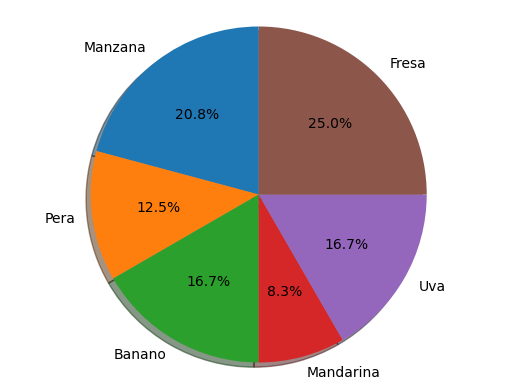

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(dt['cantidad'],  labels=dt['frutas'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Diagrama de cajas y bigotes - boxplot
sirve para mostrar la distribución de los datos

![](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)

Allí se muestran:

* [x] valor mínimo
* [x] valor máximo
* [x] el rango intercuartílico
* [x] el promedio
* [x] valores atípicos inferiores y superiores 


In [17]:
import pandas as pd
res = pd.read_csv('DatosSeguros.csv')

Text(0.5, 1.0, 'Boxplot valor por condición')

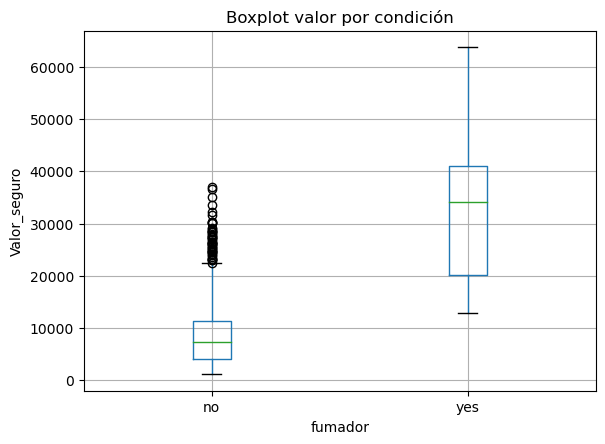

In [18]:
fig = res.boxplot("valor_seguro", by="fumador")
plt.ylabel('Valor_seguro')
plt.suptitle('')
plt.title('Boxplot valor por condición')